# Data Preprocessing

# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Data

In [0]:
# drive urls
uom_space_url = '/content/drive/My Drive/MAST90106/project-data/uom-space.xlsx'
rm_category_type_url = '/content/drive/My Drive/MAST90106/project-data/rm-category-type-py-compatible.xlsx'
em_location_url = '/content/drive/My Drive/MAST90106/project-data/em-location.xlsx'
av_equipment_url = '/content/drive/My Drive/MAST90106/project-data/av-equipment.xlsx'
timetable_2020_url = '/content/drive/My Drive/MAST90106/project-data/2020-timetable-v2.xlsx'
floor_data_url = '/content/drive/My Drive/MAST90106/project-data/fl-name.xlsx'
meeting_room_usage_url = '/content/drive/My Drive/MAST90106/project-data/meeting-room-usage.xlsx'

#loading data in respective data frames
uom_space_df = pd.read_excel(uom_space_url)
rm_category_type_df = pd.read_excel(rm_category_type_url)
em_location_df = pd.read_excel(em_location_url)
av_equipment_df = pd.read_excel(av_equipment_url)
timetable_2020_df = pd.read_excel(timetable_2020_url)
floor_df = pd.read_excel(floor_data_url)
meeting_room_usage_df = pd.read_excel(meeting_room_usage_url)

# Data Cleaning , pre-process and visualizations Functions

In [0]:


def clean_data(df):
  #convert all the string type values to lower case.
  for i in df.columns:
    if df[i].dtype == 'object':
      df[i] = df[i].fillna('_MISSING_')
      df[i] = df[i].astype('str').str.strip().str.lower()
    elif df[i].dtype == 'float64':
      df[i] = df[i].fillna(0.0)
      df[i] = df[i].astype('str').str.strip().astype('float')
    elif df[i].dtype == 'int64':
      df[i] = df[i].fillna(0)
      df[i] = df[i].astype('str').str.strip().astype('int')
  df = df.drop_duplicates(subset=None, keep="first", inplace=True)

def plot_data(dataframe):
    missing_data = dataframe.isnull().sum()
    df = pd.DataFrame({'Column Name':missing_data.index, 'Missing Data Count':missing_data.values})
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Column Name', y = 'Missing Data Count', data=df)
    plt.xticks(rotation = 90)
    plt.show()
#check percentage of missing data in uom space dataset
    for col in dataframe.columns:
        pct_missing = np.mean(dataframe[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

def split_data(df,col,delimeter,position,new_col):
    if new_col == 'no':
      for idx,row in em_location_df.iterrows():
        if delimeter in row[col]:
          code = row[col].split(delimeter)[position]
          df.at[idx,col] = code
    else:
      df[new_col]= df[col].apply(lambda x: str(x).split(delimeter)[int(position)] if str(x).find(delimeter)!=-1 else str(x) )

def delete_col(df,col):
  for i in range(len(col)):
    del df[col[i]]

def rename_drop_cols(df):
    cols_to_delete = []
    cols_to_rename_from = []
    cols_to_rename_to = []
    for i in df.columns:
        if '_y' in i:
            cols_to_delete.append(i)
        if '_x' in i:
            cols_to_rename_from.append(i)
            cols_to_rename_to.append(i.split('_x')[0])
    for i in range(len(cols_to_delete)):
        del df[cols_to_delete[i]]
    df.rename(columns=dict(zip(cols_to_rename_from, cols_to_rename_to)), inplace=True)


# Data visualize

Display datasets and the columns that need to be cleaned.

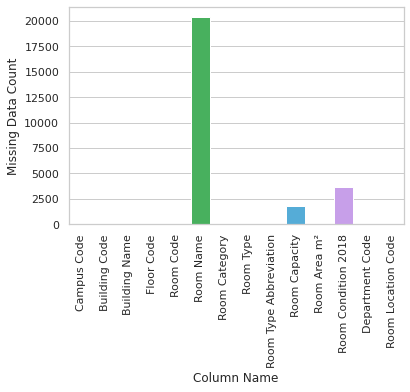

Campus Code - 0.0%
Building Code - 0.0%
Building Name - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Room Name - 92.0%
Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Capacity - 8.0%
Room Area m² - 0.0%
Room Condition 2018 - 16.0%
Department Code - 0.0%
Room Location Code - 0.0%


In [0]:
plot_data(uom_space_df)

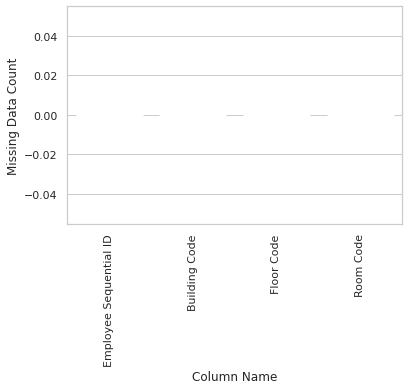

Employee Sequential ID - 0.0%
Building Code - 0.0%
Floor Code - 0.0%
Room Code - 0.0%


In [0]:
plot_data(em_location_df)

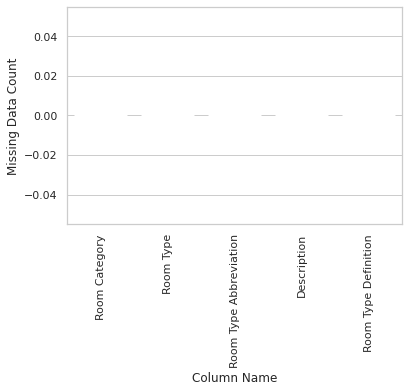

Room Category - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Description - 0.0%
Room Type Definition - 0.0%


In [0]:
plot_data(rm_category_type_df)

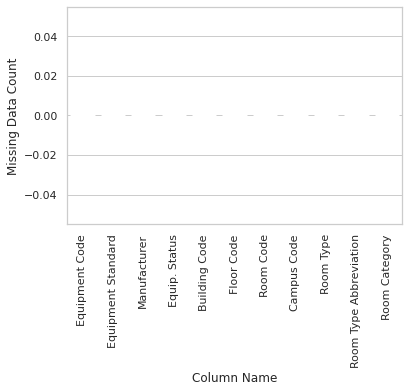

Equipment Code - 0.0%
Equipment Standard - 0.0%
Manufacturer - 0.0%
Equip. Status - 0.0%
Building Code - 0.0%
Floor Code - 0.0%
Room Code - 0.0%
Campus Code - 0.0%
Room Type - 0.0%
Room Type Abbreviation - 0.0%
Room Category - 0.0%


In [0]:
plot_data(av_equipment_df)

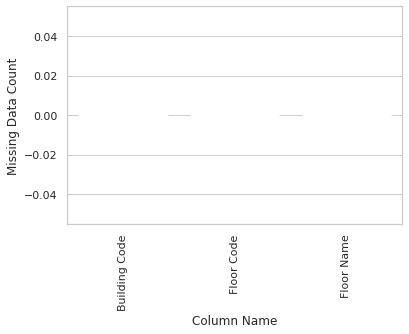

Building Code - 0.0%
Floor Code - 0.0%
Floor Name - 0.0%


In [0]:
plot_data(floor_df)

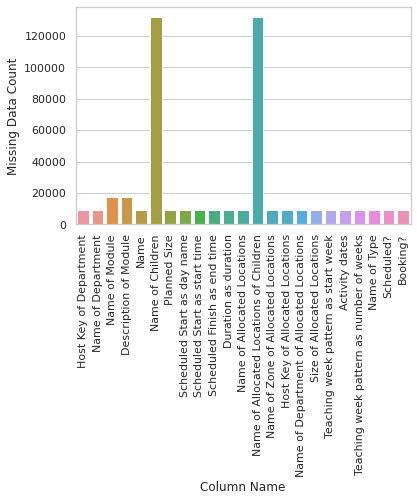

Host Key of Department - 7.0%
Name of Department - 7.0%
Name of Module - 13.0%
Description of Module - 13.0%
Name - 7.0%
Name of Children - 100.0%
Planned Size - 7.0%
Scheduled Start as day name - 7.0%
Scheduled Start as start time - 7.0%
Scheduled Finish as end time - 7.0%
Duration as duration - 7.0%
Name of Allocated Locations - 7.0%
Name of Allocated Locations of Children - 100.0%
Name of Zone of Allocated Locations - 7.0%
Host Key of Allocated Locations - 7.0%
Name of Department of Allocated Locations - 7.0%
Size of Allocated Locations - 7.0%
Teaching week pattern as start week - 7.0%
Activity dates - 7.0%
Teaching week pattern as number of weeks - 7.0%
Name of Type - 7.0%
Scheduled? - 7.0%
Booking? - 7.0%


In [0]:
plot_data(timetable_2020_df)

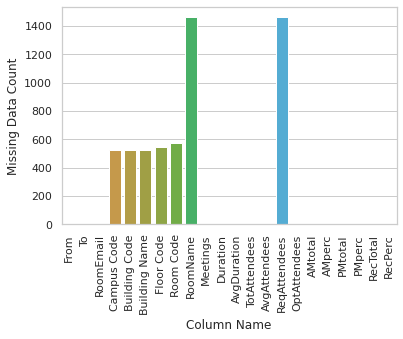

From - 0.0%
To - 0.0%
RoomEmail - 0.0%
Campus Code - 36.0%
Building Code - 36.0%
Building Name - 36.0%
Floor Code - 37.0%
Room Code - 39.0%
RoomName - 100.0%
Meetings - 0.0%
Duration - 0.0%
AvgDuration - 0.0%
TotAttendees - 0.0%
AvgAttendees - 0.0%
ReqAttendees - 100.0%
OptAttendees - 0.0%
AMtotal - 0.0%
AMperc - 0.0%
PMtotal - 0.0%
PMperc - 0.0%
RecTotal - 0.0%
RecPerc - 0.0%


In [0]:
plot_data(meeting_room_usage_df)

# Display Headers of Data(To understand briefly about the data to be cleaned)

In [0]:
uom_space_df.head()

,Campus Code,Building Code,Building Name,Floor Code,Room Code,Room Name,Room Category,Room Type,Room Type Abbreviation,Room Capacity,Room Area m²,Room Condition 2018,Department Code,Room Location Code
0,PAR,101,BEAUREPAIRE CENTRE,0,CG01,NaN,6,631,Circ-Department,0.0,80.62,NaN,8490,PAR;101;0;CG01
1,PAR,101,BEAUREPAIRE CENTRE,0,CG02,NaN,8,805,Circulation,0.0,12.00,NaN,UNIGEN,PAR;101;0;CG02
2,PAR,101,BEAUREPAIRE CENTRE,0,CG03,NaN,6,631,Circ-Department,0.0,14.12,NaN,8490,PAR;101;0;CG03
3,PAR,101,BEAUREPAIRE CENTRE,0,CG04,NaN,8,805,Circulation,0.0,11.01,NaN,UNIGEN,PAR;101;0;CG04
4,PAR,101,BEAUREPAIRE CENTRE,0,G02,NaN,6,623,Waiting/Foyer,0.0,57.35,NaN,8490,PAR;101;0;G02


In [0]:
rm_category_type_df.head()

,Room Category,Room Type,Room Type Abbreviation,Description,Room Type Definition
0,1,100,Office - Other,Office - Other ...,"To be used, as the last resort, for any ""Offic..."
1,1,101,Office Academic,Office - Academic Staff ...,A room with office furniture which provides ac...
2,1,102,Office Research,Office - Research Staff ...,A room with office furniture which provides ac...
3,1,103,Office Grad Res,Office - Graduate Researcher ...,A room with office furniture which provides ac...
4,1,104,Off-Tech,Office - Technical/Laboratory/Store Staff ...,A room with office furniture which provides ac...


In [0]:
em_location_df.head()

,Employee Sequential ID,Building Code,Floor Code,Room Code
0,1,102,4.0,438.01
1,2,102,0.0,G21.01
2,3,102,3.0,332.01
3,4,102,3.0,333.03
4,5,102,0.1,B08F


In [0]:
av_equipment_df.head()

,Equipment Code,Equipment Standard,Manufacturer,Equip. Status,Building Code,Floor Code,Room Code,Campus Code,Room Type,Room Type Abbreviation,Room Category
0,B122-R2-A18,MIC WL HANDHELD,Sennheiser,In service,379,0.1,B131,PAR,217,Collaborative,2
1,B122-R2-A20,WL PRES SYSTEM,Extron,In service,379,0.1,B131,PAR,217,Collaborative,2
2,B122-R2-B07,CONTROL SYSTEM,Extron,In service,379,0.1,B117,PAR,308,Stud Comp-Teach,3
3,B122-R2-B08,WL PRES SYSTEM,Extron,In service,379,0.1,B117,PAR,308,Stud Comp-Teach,3
4,B122-R2-E22,WL PRES SYSTEM,Extron,In service,379,0.1,B116,PAR,308,Stud Comp-Teach,3


In [0]:
floor_df.head()

,Building Code,Floor Code,Floor Name
0,101,0,Ground
1,101,0.1,Basement 1
2,101,1,Level 1
3,101,1.5,Level 1 Mezzanine
4,101,R,Roof


In [0]:
timetable_2020_df.head()

,Host Key of Department,Name of Department,Name of Module,Description of Module,Name,Name of Children,Planned Size,Scheduled Start as day name,Scheduled Start as start time,Scheduled Finish as end time,Duration as duration,Name of Allocated Locations,Name of Allocated Locations of Children,Name of Zone of Allocated Locations,Host Key of Allocated Locations,Name of Department of Allocated Locations,Size of Allocated Locations,Teaching week pattern as start week,Activity dates,Teaching week pattern as number of weeks,Name of Type,Scheduled?,Booking?
0,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-06,12.0,Seminar,t,N
1,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-13,12.0,Seminar,t,N
2,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-20,12.0,Seminar,t,N
3,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-03-27,12.0,Seminar,t,N
4,166.0,ARTS - Social & Politic Sci,SOCI30013/U/1/SM1,Survey Design and Analysis,SOCI30013/U/1/SM1/S01/02,NaN,24.0,Friday,09:00:00,12:00:00,03:00:00,PAR-John Medley-WG09 (SSPS Research Hub),NaN,PR - Professors Walk,191-WG09,ARTS - Social & Politic Sci,24.0,10.0,2020-04-03,12.0,Seminar,t,N


In [0]:
meeting_room_usage_df.head()

,From,To,RoomEmail,Campus Code,Building Code,Building Name,Floor Code,Room Code,RoomName,Meetings,Duration,AvgDuration,TotAttendees,AvgAttendees,ReqAttendees,OptAttendees,AMtotal,AMperc,PMtotal,PMperc,RecTotal,RecPerc
0,2019-01-09,2020-01-04,113-1-136-Room@unimelb.edu.au,PAR,113,BALDWIN SPENCER BUILDING,1.0,136,NaN,422,32010.0,76,1250,3,NaN,114,171,41,251,59,201,48
1,2019-01-09,2020-01-04,113-2-205-Room@unimelb.edu.au,PAR,113,BALDWIN SPENCER BUILDING,2.0,205,NaN,213,18600.0,87,586,3,NaN,77,89,42,124,58,36,17
2,2019-01-09,2020-01-04,133ABPKitchen@unimelb.edu.au,PAR,133,GLYN DAVIS BUILDING,0.1,B108,NaN,1,90.0,90,2,2,NaN,1,0,0,1,100,0,0
3,2019-01-09,2020-01-04,133ABPL1DeansConf@unimelb.edu.au,PAR,133,GLYN DAVIS BUILDING,1.0,102,NaN,547,49010.0,90,1872,3,NaN,42,261,48,286,52,74,14
4,2019-01-09,2020-01-04,133ABPL1DeansMR109@unimelb.edu.au,PAR,133,GLYN DAVIS BUILDING,1.0,109,NaN,477,23915.0,50,1033,2,NaN,24,207,43,270,57,101,21


# Cleaning dataframes and pre-processing on dataframes

Delete columns which are not required

In [0]:
delete_col(timetable_2020_df,['Name of Children','Name of Allocated Locations of Children','Scheduled?','Booking?'])

In [0]:
clean_data(uom_space_df)
clean_data(em_location_df)
clean_data(rm_category_type_df)
clean_data(av_equipment_df)
clean_data(floor_df)
clean_data(timetable_2020_df)
clean_data(meeting_room_usage_df)

In [28]:
timetable_2020_df = timetable_2020_df[timetable_2020_df['Host Key of Allocated Locations'] != '_missing_'] 
timetable_2020_df = timetable_2020_df[timetable_2020_df['Host Key of Allocated Locations'] != 'online option.' ]
timetable_2020_df = timetable_2020_df[timetable_2020_df['Name of Zone of Allocated Locations'] != 'off-site'] 
timetable_2020_df.shape

(119419, 23)

Pre-process columns(create or convert existing columns.)

In [0]:
split_data(em_location_df,'Room Code','.',0,'no')
split_data(timetable_2020_df,'Host Key of Allocated Locations','-',0,'Building Code')
split_data(timetable_2020_df,'Host Key of Allocated Locations','-',1,'Room Code')
split_data(timetable_2020_df,'Name of Allocated Locations','-',0,'Campus Code')
timetable_2020_df['Campus Code'] = timetable_2020_df['Campus Code'].replace('zzzpar','par')

Converting data type of the column data and processing columns for merge

In [0]:
uom_space_df['Room Type'] = uom_space_df['Room Type'].astype(str).str.strip()
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype(int)
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype(str).str.strip()
meeting_room_usage_df['Floor Code'] = meeting_room_usage_df['Floor Code'].astype(int)
meeting_room_usage_df['Floor Code'] = meeting_room_usage_df['Floor Code'].astype(str).str.strip()



# Merging Datasets

Merge uom space data with room data, floor dataset

In [36]:
uom_rm_df = pd.merge(uom_space_df,rm_category_type_df,on = ['Room Type','Room Category'])
enhanced_uom_rm_df = pd.merge(uom_rm_df,floor_df, on = ['Building Code','Floor Code'])
enhanced_uom_rm_df.shape

(22166, 18)

Merge employee dataset with enhanced space data set

In [37]:
em_enhanced_df  = pd.merge(em_location_df,enhanced_uom_rm_df, on = ['Building Code','Floor Code','Room Code'])
em_enhanced_df.shape

(6962, 19)

merging meeting room usage with uom and room data set set

In [38]:
meeting_enhanced_uom_df = pd.merge(meeting_room_usage_df,enhanced_uom_rm_df, on=['Campus Code','Building Code','Floor Code','Room Code'])
meeting_enhanced_uom_df.shape

(728, 36)

Merge student dataset and uom and room datasets

In [42]:
timetable_uom_df = pd.merge(timetable_2020_df,enhanced_uom_rm_df, on = ['Building Code','Campus Code','Room Code'])
timetable_uom_df.shape



(116981, 37)

On closer observation, there are duplicate columns in the merged data set that needs to be renamed or dropped. Below section removes duplicate columns and rename any deformed column name

In [0]:
rename_drop_cols(enhanced_uom_rm_df)
rename_drop_cols(em_enhanced_df)
rename_drop_cols(meeting_enhanced_uom_df)
rename_drop_cols(timetable_uom_df)

Cleaned data sets

In [50]:
print(enhanced_uom_rm_df.shape)
print(em_enhanced_df.shape)
print(meeting_enhanced_uom_df.shape)
print(timetable_uom_df.shape)

(22166, 17)
(6962, 18)
(728, 34)
(116981, 36)
